# Финальное задание модуля PYTHON-13 #
## (Анализ и визуализация данных) ##
Подробное описание содержится в файле [**`README.md`**](https://github.com/stalkspectrum/sf-ds-course-all/blob/master/01-16-PYTHON-13/P13_Task/README.md).

### Предварительная подготовка данных ###

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Для корректной работы Jupyter Notebook
%matplotlib inline
## Для корректного отображения графиков в тёмной теме
plt.style.use('default')

main_df = pd.read_csv('churn.csv', sep=',')

# Убираем лишний столбец RowNumber
main_df.drop('RowNumber', axis='columns', inplace=True)

# Меняем тип данных столбцов HasCrCard, IsActiveMember на boolean
# main_df['HasCrCard'] = main_df['HasCrCard'].apply(lambda x: True if x == 1. else False).astype('bool')
# main_df['IsActiveMember'] = main_df['IsActiveMember'].apply(lambda x: True if x == 1. else False).astype('bool')

# Меняем числовой тип данных (1/0) признака Exited на категориальный строковый (Exited/Loyal)
# main_df['Exited'] = main_df['Exited'].apply(lambda x: 'Exited' if x == 1. else 'Loyal').astype('category')
display(main_df.head())
display(main_df.info())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


None

----

### Задание 9.1. ###
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

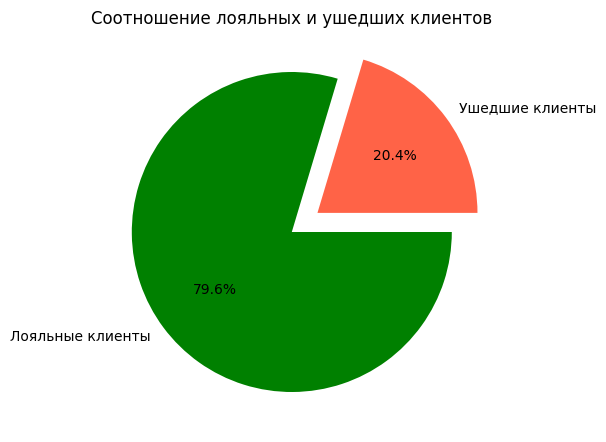

In [54]:
exited_clients = main_df[main_df.Exited == 1].Exited.shape[0]
loyal_clients = main_df.shape[0] - exited_clients

loyalty_pic = plt.figure(figsize=(4, 5))
axes = loyalty_pic.add_axes([0, 0, 1, 1])
axes.pie(
    x=[loyal_clients, exited_clients],
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    colors=['green', 'tomato'],
    autopct='%.1f%%',
    explode=[0, 0.2],
    shadow=False,
    counterclock=False
)
axes.set_title('Соотношение лояльных и ушедших клиентов');

***Комментарий***

Из графика видно, что ушедшие клиенты составляет значительную долю (больше **20%**) за отчётный период. Само по себе это количество ещё ни о чём не говорит, поскольку неизвестен этот "отчётный период", однако если банк обеспокоился, надо проводить исследования того, чем ушедшие клиенты отличаются от оставшихся.

----

### Задание 9.2. ###
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше **2500** долларов. Опишите распределение и сделайте выводы.

Дополнительная статистика распределения клиентов по балансу:
              Balance
count    6383.000000
mean   119827.493793
std     30095.056462
min      3768.690000
25%    100181.975000
50%    119839.690000
75%    139512.290000
max    250898.090000


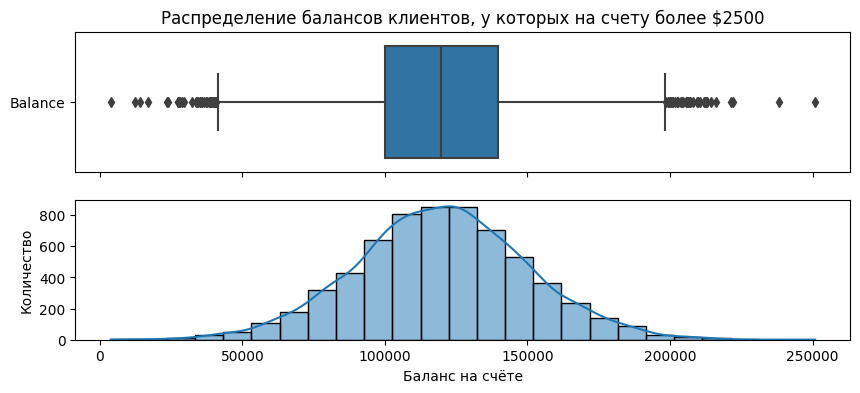

In [57]:
tmp_ser = main_df[main_df.Balance > 2500][['Balance']]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 4), sharex=True)
sns.boxplot(
    data=tmp_ser,
    orient='h',
    ax=ax1
)
sns.histplot(
    data=tmp_ser,
    bins=25,
    kde=True,
    legend=False,
    ax=ax2
)
ax1.set_title('Распределение балансов клиентов, у которых на счету более $2500')
ax1.set_xlabel('')
ax2.set_xlabel('Баланс на счёте')
ax2.set_ylabel('Количество')
print('Дополнительная статистика распределения клиентов по балансу:\n',
    tmp_ser.describe()
    )

***Комментарии***

- Распределение нормальное, симметричное. Среднее значение и медиана практически равны 120 тысячам.

- IQR также симметричен (от 100 до 140 тысяч).

- Можно утверждать, что для данной клиентской выборки у большинства клиентов баланс счёта лежит в диапазоне от 60 до 200 тысяч (внутри "усов") с некоторыми выбросами в обе стороны.

----

### Задание 9.3. ###
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Балансы клиентов, у кого меньше 2500:
 0.0    3617
Name: Balance, dtype: int64
Доля нулевых балансов среди лояльных клиентов: 39.1 %
Доля нулевых балансов среди ушедших клиентов: 24.5 %


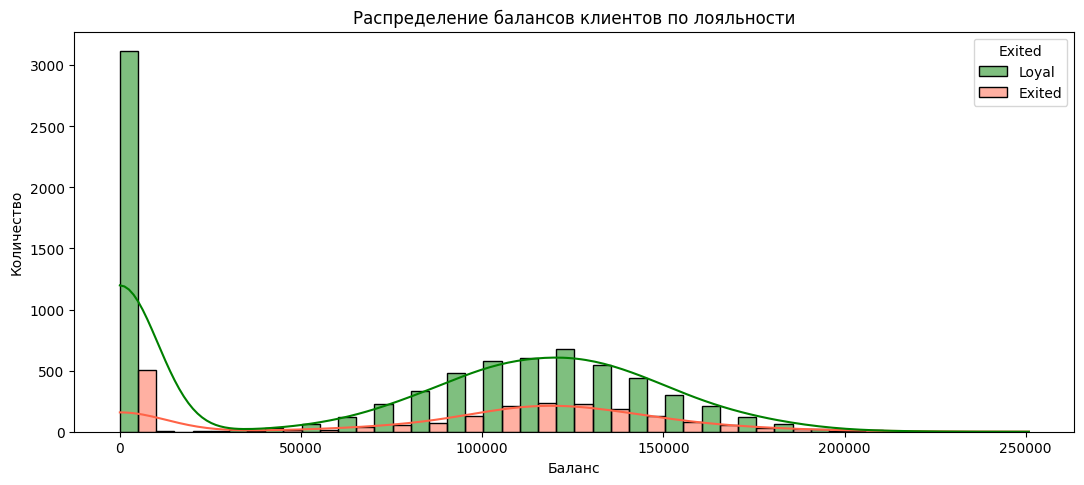

In [60]:
tmp_df = main_df.copy()
tmp_df.Exited = tmp_df.Exited.apply(lambda x: 'Exited' if x == 1. else 'Loyal')

balances_pic = plt.figure(figsize=(10, 4))
axes = balances_pic.add_axes([0, 0, 1, 1])
sns.histplot(
    data=tmp_df,
    x='Balance',
    hue='Exited',
    hue_order=['Loyal', 'Exited'],
    multiple='dodge',
    bins=25,
    palette={'Loyal': 'green', 'Exited': 'tomato'},
    kde=True,
    ax=axes
)
axes.set_title('Распределение балансов клиентов по лояльности')
axes.set_xlabel('Баланс')
axes.set_ylabel('Количество')
print(
    'Балансы клиентов, у кого меньше 2500:\n',
    tmp_df[tmp_df.Balance <= 2500].Balance.value_counts()
    )
print(
    'Доля нулевых балансов среди лояльных клиентов:',
    round(tmp_df[tmp_df.Exited == 'Loyal'].Balance.value_counts(normalize=True).loc[0.] * 100, 1),
    '%'
    )
print(
    'Доля нулевых балансов среди ушедших клиентов:',
    round(tmp_df[tmp_df.Exited == 'Exited'].Balance.value_counts(normalize=True).loc[0.] * 100, 1),
    '%'
    )

***Комментарии***

Обозначились первые различия. Выяснилось, что на самом деле у всех клиентов с низким балансом (меньше 2500) на счёте&nbsp;&mdash;**0**, и такие клиенты составляют 36.2% от всех клиентов (3617 из 10000).

Однако по признаку лояльности эти доли заметно отличаются&nbsp;&mdash; **39,1%** для лояльных и **24,5%** для ушедших.

----

### Задание 9.4. ###
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Распределение лояльных клиентов по возрасту:
 count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64
Распределение ушедших клиентов по возрасту:
 count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64


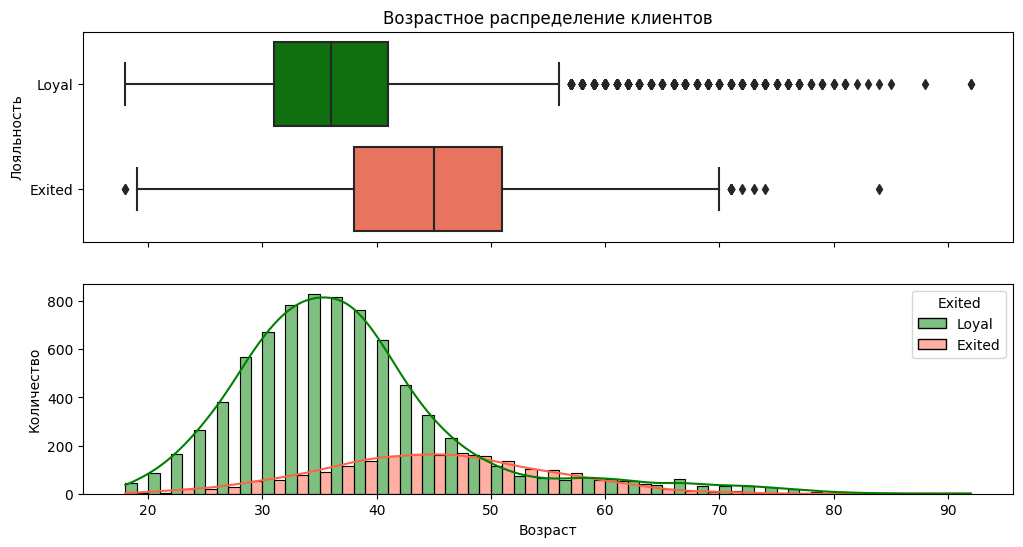

In [63]:
tmp_df = main_df.copy()
tmp_df.Exited = tmp_df.Exited.apply(lambda x: 'Exited' if x == 1. else 'Loyal')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)
sns.boxplot(
    data=tmp_df,
    x='Age',
    y='Exited',
    # y=tmp_ser['Exited'],
    orient='h',
    order=['Loyal', 'Exited'],
    palette={'Loyal': 'green', 'Exited': 'tomato'},
    ax=ax1
)
sns.histplot(
    data=tmp_df,
    x='Age',
    hue='Exited',
    hue_order=['Loyal', 'Exited'],
    multiple='dodge',
    bins=37,
    kde=True,
    palette={'Loyal': 'green', 'Exited': 'tomato'},
    ax=ax2
)
ax1.set_title('Возрастное распределение клиентов')
ax1.set_xlabel('')
ax1.set_ylabel('Лояльность')
ax2.set_xlabel('Возраст')
ax2.set_ylabel('Количество')
print('Распределение лояльных клиентов по возрасту:\n',
    tmp_df[tmp_df.Exited == 'Loyal'].Age.describe()
    )
print('Распределение ушедших клиентов по возрасту:\n',
    tmp_df[tmp_df.Exited == 'Exited'].Age.describe()
    )

***Комментарии***

Для лояльных медиана&nbsp;&mdash; 36 лет, IQR&nbsp;&mdash; 31-41. Для ушедших медиана&nbsp;&mdash; 45 лет, IQR&nbsp;&mdash;38-51 (на этом диапазоне как раз и следует сконцентрироваться).

Распределение для ушедших более широкое и охватывает практически все возрастные категории от 20 до 70 лет с незначительными выбросами за 70 и одним самым большим&nbsp;&mdash; 84 года.

В то время, как распределение лояльных статистически более узкое, охватывает диапазон 18-56 лет с плавным снижением выбросов до максимального значения в 92 года.

По гистограмме видно, что дополнительно можно обратить внимание на возрастную группу от 50 до 60 лет, где число ушедших превышает число лояльных.

----

### Задание 9.5. ###
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

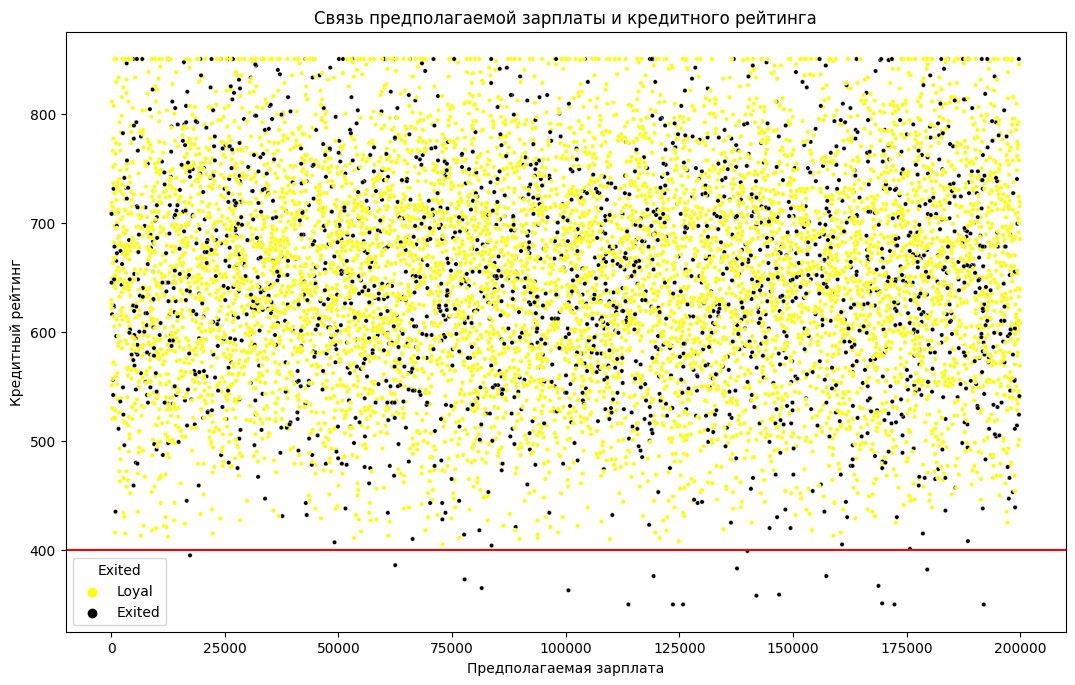

In [83]:
tmp_df = main_df.copy()
tmp_df.Exited = tmp_df.Exited.apply(lambda x: 'Exited' if x == 1. else 'Loyal')
# CreditScore
# EstimatedSalary

fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0, 0, 1, 1])
sns.scatterplot(
    data=tmp_df,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    hue_order=['Loyal', 'Exited'],
    # markers=['+', 'o',],
    # sizes={'Loyal': 10, 'Exited': 30},
    s=10,
    palette={'Loyal': 'yellow', 'Exited': 'black'},
    ax=axes
)
axes.axhline(400, color='red')
axes.set_title('Связь предполагаемой зарплаты и кредитного рейтинга')
axes.set_xlabel('Предполагаемая зарплата')
axes.set_ylabel('Кредитный рейтинг');


***Комментарии***

Явной взаимосвязи не видно. Разве что в области крайне низкого кредитного рейтинга (ниже 400, под красной линией) есть только ушедшие клиенты.

----

### Задание 9.6. ###
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

***Подсказка***

Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу **`Exited`** (так как **1** — это ушедшие клиенты, а **0** — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

In [110]:
tmp_df = main_df[['Gender', 'Exited']].groupby('Gender', as_index=False).mean()
tmp_df.Exited = tmp_df.Exited.apply(lambda x: x*100)
display(tmp_df)

,Gender,Exited
0,Female,25.071539
1,Male,16.455928


Процент ушедших среди мужчин: 16.5
Процент ушедших среди женщин: 25.1


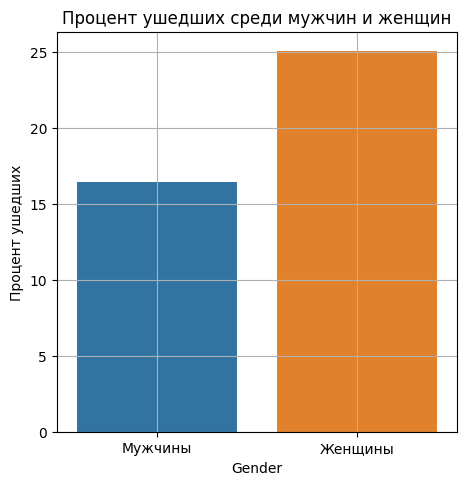

In [143]:
tmp_df = main_df[['Gender', 'Exited']].groupby('Gender', as_index=False).mean()
tmp_df.Exited = tmp_df.Exited.apply(lambda x: x * 100)
tmp_df.Gender = tmp_df.Gender.apply(lambda x: 'Мужчины' if x == 'Male' else 'Женщины')

gender_pic = plt.figure(figsize=(4, 4))
axes = gender_pic.add_axes([0, 0, 1, 1])
sns.barplot(
    data=tmp_df,
    x='Gender',
    y='Exited',
    order=['Мужчины', 'Женщины'],
    ax=axes
)
axes.set_title('Процент ушедших среди мужчин и женщин')
axes.set_ylabel('Процент ушедших')
axes.grid()

print(
    'Процент ушедших среди мужчин:',
    round(float(tmp_df.Exited.loc[tmp_df.Gender == 'Мужчины']), 1)
    )
print(
    'Процент ушедших среди женщин:',
    round(float(tmp_df.Exited.loc[tmp_df.Gender == 'Женщины']), 1)
    )

***Комментарии***

Из графика видно, что чаще уходят женщины.

----

### Задание 9.7. ###
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

,NumOfProducts,Loyalty,Exited
0,1,Exited,1409
1,1,Loyal,3675
2,2,Exited,348
3,2,Loyal,4242
4,3,Exited,220
5,3,Loyal,46
6,4,Exited,60


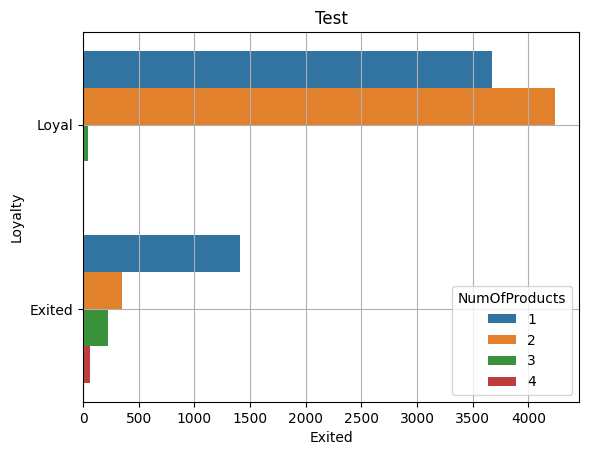

In [169]:
tmp_df = main_df.copy()
tmp_df['Loyalty'] = tmp_df.Exited.apply(lambda x: 'Loyal' if x == 0 else 'Exited')
tmp_grp = tmp_df[['NumOfProducts', 'Exited', 'Loyalty']].groupby(['NumOfProducts', 'Loyalty'], as_index=False).count()
display(tmp_grp)

# products_pic = plt.figure(figsize=(8, 8))
# axes = products_pic.add_axes([0, 0, 1, 1])

fff = sns.barplot(
    data=tmp_grp,
    x='Exited',
    y='Loyalty',
    hue='NumOfProducts',
    orient='h',
    order=['Loyal', 'Exited'],
    hue_order=[1, 2, 3, 4],
    # ax=axes
)
fff.set_title('Test')
fff.grid()

----

### Задание 9.8. ###
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

----

### Задание 9.9. ###
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

----

### Задание 9.10. ###
Переведите числовой признак **`CreditScore`** в категориальный. Для этого воспользуйтесь функцией `get_credit_score_cat()`, которая приведена ниже. Примените её к столбцу **`CreditScore`** и создайте новый признак **`CreditScoreCat`** — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (**`CreditScoreCat`**), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (**`Tenure`**). В ячейках сводной таблицы должно находиться среднее по признаку оттока (**`Exited`**) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score < 300:
        return "Deep"
    elif credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
